# function transformation is used to transfer data into normal distribution data when data are in non normal distribution
# log is used 
# when data set are too much large then we use this function 
# convert non normal distribution data in normal distribution data type
# use non missing numeric value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [2]:
df=pd.read_csv(r"C:\\Users\\A S P I R E 7\\Downloads\\loan-train.csv")

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


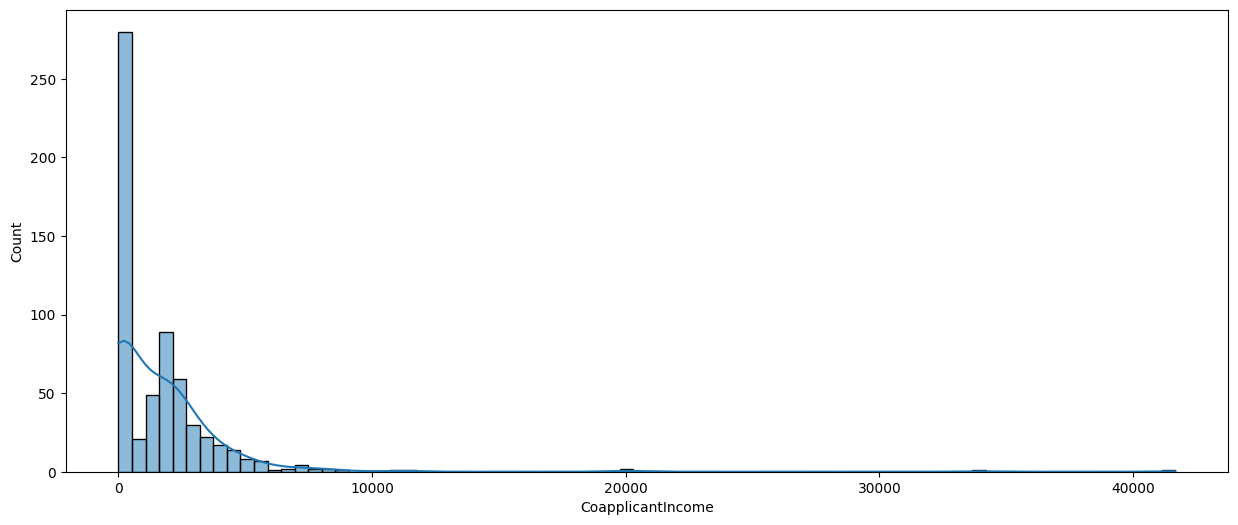

In [4]:
plt.figure(figsize=(15,6))
sns.histplot(x="CoapplicantIncome",data=df,kde=True)
plt.show()


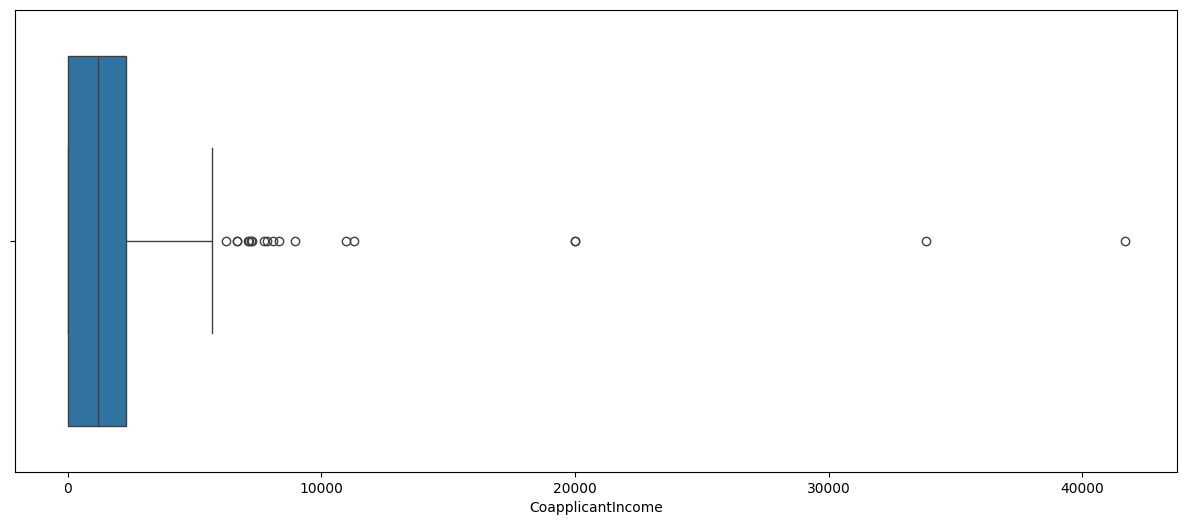

In [5]:
plt.figure(figsize=(15,6))
sns.boxplot(x="CoapplicantIncome",data=df)
plt.show()

#remove out layer using IQR Method

In [6]:
q1=df["CoapplicantIncome"].quantile(0.25)
q3=df["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1

In [7]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

In [8]:
min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [9]:
df[df["CoapplicantIncome"]<=max_range]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df=df[df["CoapplicantIncome"]<=max_range]

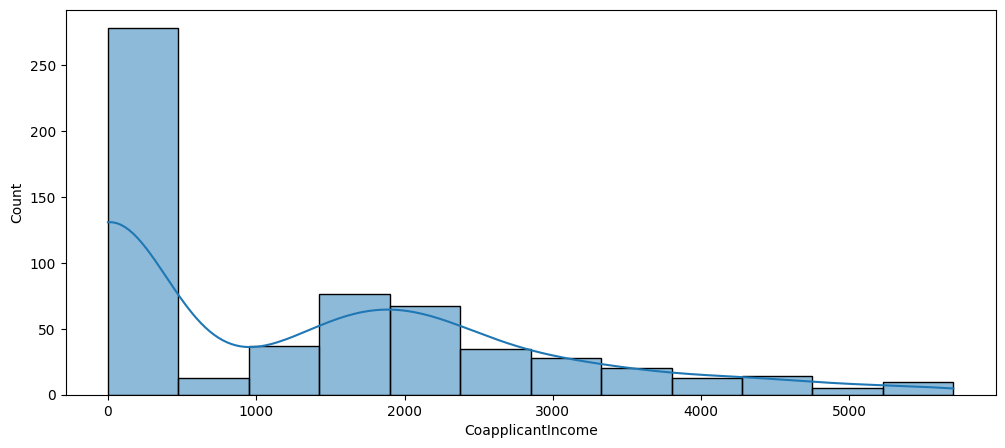

In [11]:
plt.figure(figsize=(12,5))
sns.histplot(x="CoapplicantIncome",data=df,kde=True)
plt.show()

In [12]:
from sklearn.preprocessing import FunctionTransformer

ft=FunctionTransformer(func=np.log1p)

ft.fit(df[["CoapplicantIncome"]])

ft.transform(df[["CoapplicantIncome"]])

In [14]:
df["CoapplicantIncome_tf"]=ft.transform(df[["CoapplicantIncome"]])

NameError: name 'ft' is not defined

ValueError: Could not interpret value `CoapplicantIncome_tf` for `x`. An entry with this name does not appear in `data`.

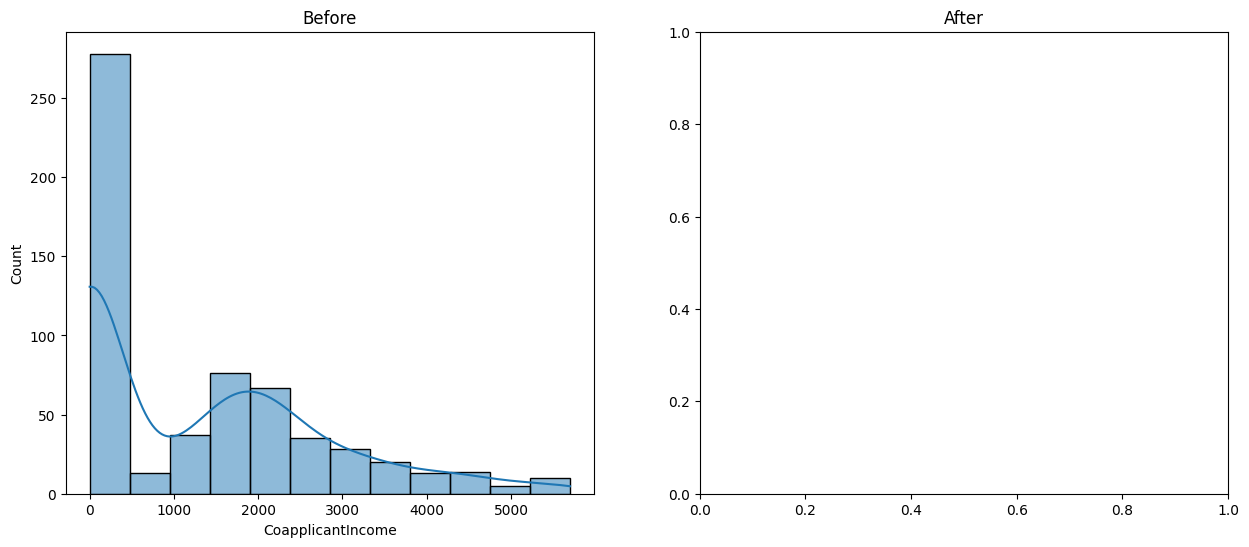

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(x="CoapplicantIncome",data=df,kde=True)

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(x="CoapplicantIncome_tf",data=df,kde=True)

plt.show()

# outlier are not removed from data

In [16]:
ft1=FunctionTransformer(func=lambda x:x^2)
ft1.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<function <lambda> at 0x000002749EF38C20>)

In [17]:
ft1.transform(df[["CoapplicantIncome"]])

TypeError: Cannot perform 'xor' with a dtyped [float64] array and scalar of type [bool]

In [18]:
df["CoapplicantIncome_tf1"]=ft1.transform(df[["CoapplicantIncome"]])

TypeError: Cannot perform 'xor' with a dtyped [float64] array and scalar of type [bool]

ValueError: Could not interpret value `CoapplicantIncome_tf1` for `x`. An entry with this name does not appear in `data`.

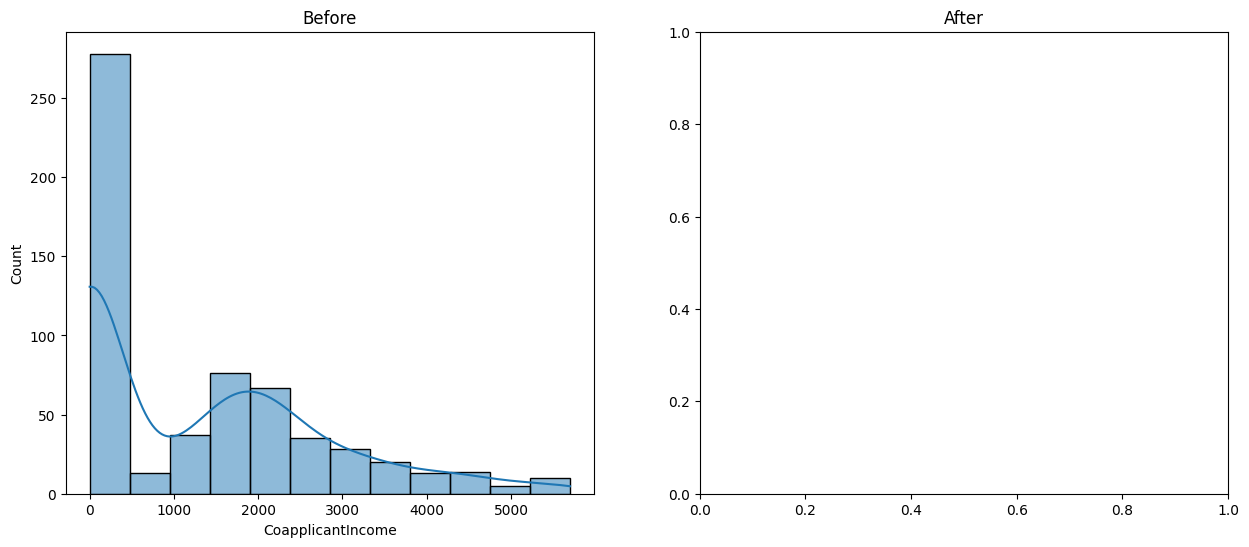

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(x="CoapplicantIncome",data=df,kde=True)

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(x="CoapplicantIncome_tf1",data=df,kde=True)

plt.show()